<a href="https://colab.research.google.com/github/jahnzab/image_classification-of-Dog-vs-cat/blob/main/final_cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [100]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

In [183]:
import zipfile
zip_ref =zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content'
)
zip_ref.close()

In [184]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/train',
    labels ='inferred',
    label_mode= 'int',
    batch_size=32,

    image_size=(128,128)


    )
validation_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels ='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(128,128)


)



In [186]:
# Define the normalization process
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
def preprocess(image, label):
    image = tf.cast(image / 255.0, tf.float32)  # Normalize images to [0, 1]
    return image, label

# Apply preprocessing, caching, shuffling, and prefetching
train_ds = train_ds.map(preprocess).cache().shuffle(5000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = validation_ds.map(preprocess).prefetch(buffer_size=tf.data.AUTOTUNE)

# Define data augmentation
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomBrightness, RandomContrast, RandomTranslation

data_augmentation = Sequential([
    RandomFlip("horizontal"),            # Random horizontal flip
    RandomRotation(0.3),                 # Random rotation (up to 20%)
    RandomZoom(0.3),                     # Random zoom (up to 20%)
    RandomBrightness(0.3),               # Random brightness change (up to 20%)
    RandomContrast(0.3),                 # Random contrast adjustment (up to 20%)
    tf.keras.layers.RandomTranslation(height_factor=0.45, width_factor=0.45)  # Random translation (shift)
])




In [ ]:
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Flatten())

# Dense layers with both dropout and L2 regularization
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.45))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.45))
model.add(Dense(1, activation='sigmoid'))

model.summary()

In [188]:
model.compile(
    optimizer='adam',  # Use Adam optimizer
    loss='binary_crossentropy',          # Binary cross-entropy loss for binary classification
    metrics=['accuracy']                 # Track accuracy during training
)

In [ ]:
# Callbacks for optimization
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',  factor=0.5, patience=2, min_lr=1e-6)

####

history = model.fit(
    train_ds, epochs=15,               # Training dataset
    validation_data=validation_ds  # Validation dataset
    )

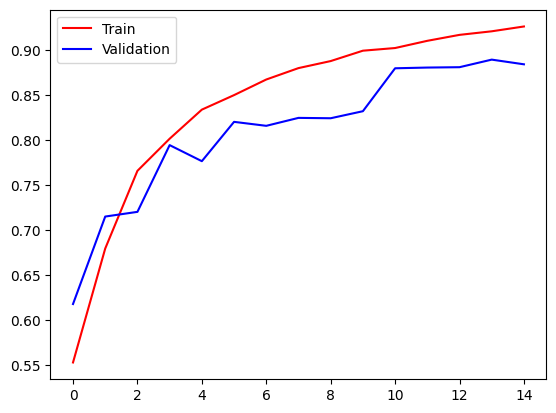

In [190]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train',color='red')
plt.plot(history.history['val_accuracy'], label='Validation',color='blue')
plt.legend()
plt.show()

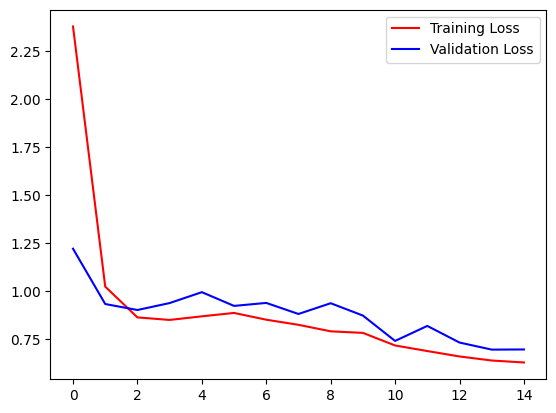

In [191]:
plt.plot(history.history['loss'], label='Training Loss',color='red')
plt.plot(history.history['val_loss'], label='Validation Loss',color='blue')
plt.legend()
plt.show()

In [ ]:
from google.colab import files
files.upload()

In [ ]:
from google.colab import files
files.upload()

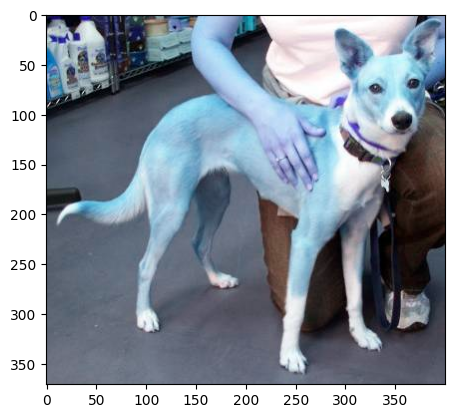

In [238]:
import cv2
test_img = cv2.imread('/content/dog.37.jpg')
plt.imshow(test_img)


In [239]:
test_img.shape
test_img=cv2.resize(test_img,(128,128))
test_input=test_img.reshape((1,128,128,3))
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.9999827]], dtype=float32)

In [240]:
prediction=model.predict(test_input)
if prediction[0] >= 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
It's a dog!
